# =========================
# Notebook 4: Feature Engineering + Modeling
# =========================

In [29]:

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


In [30]:
# Step 2: Load dataset with sentiment
df = pd.read_csv("/Users/sangsthitapanda/Desktop/L&T PROJECT/archive/employee_attrition_with_sentiment.csv")
print("Shape:", df.shape)
df.head()

Shape: (1000, 29)


,employee_id,age,gender,marital_status,department,job_role,job_level,monthly_income,hourly_rate,years_at_company,...,absenteeism,work_environment_satisfaction,relationship_with_manager,job_involvement,distance_from_home,number_of_companies_worked,attrition,sentiment_score,sentiment_label,feedback_text
0,1,58,0,1,2,3,1,15488,28,15,...,17,4,4,4,20,3,0,3.00,Positive,I am happy with my job and work-life balance.
1,2,48,0,1,4,1,5,13079,28,6,...,1,4,1,2,25,2,0,2.00,Neutral,"My job is okay, not too good or bad."
2,3,34,1,1,3,1,1,13744,24,24,...,2,3,4,4,45,3,0,3.00,Positive,I am happy with my job and work-life balance.
3,4,27,0,0,3,3,1,6809,26,10,...,18,2,3,1,35,3,0,3.25,Positive,I am happy with my job and work-life balance.
4,5,40,1,0,3,2,1,10206,52,29,...,0,4,1,3,44,3,0,3.00,Positive,I am happy with my job and work-life balance.


In [31]:
# Step 3: Drop non-useful columns
df = df.drop(columns=["employee_id", "feedback_text"], errors="ignore")

In [32]:
# Step 4: Define features and target
X = df.drop("attrition", axis=1)
y = df["attrition"]

In [33]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (800, 26) Test size: (200, 26)


In [34]:
# Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", list(categorical_cols))
print("Numeric columns:", list(numeric_cols))

Categorical columns: ['sentiment_label']
Numeric columns: ['age', 'gender', 'marital_status', 'department', 'job_role', 'job_level', 'monthly_income', 'hourly_rate', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'work_life_balance', 'job_satisfaction', 'performance_rating', 'training_hours_last_year', 'overtime', 'project_count', 'average_hours_worked_per_week', 'absenteeism', 'work_environment_satisfaction', 'relationship_with_manager', 'job_involvement', 'distance_from_home', 'number_of_companies_worked', 'sentiment_score']


In [35]:
# Define preprocessing pipeline:
# - StandardScaler for numeric features
# - OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [36]:
# Fit on training data and transform both train & test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("✅ Preprocessing complete!")
print("X_train shape after preprocessing:", X_train_processed.shape)
print("X_test shape after preprocessing:", X_test_processed.shape)


✅ Preprocessing complete!
X_train shape after preprocessing: (800, 28)
X_test shape after preprocessing: (200, 28)


In [37]:

print("Shapes:")
print("X_train:", X_train_processed.shape)
print("X_test:", X_test_processed.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes:
X_train: (800, 28)
X_test: (200, 28)
y_train: (800,)
y_test: (200,)


In [38]:
#Define Models
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
xgb_clf = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)


In [39]:

#Train Models 
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    print(f"\n📊 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


📊 Logistic Regression Results:
Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.78      0.52      0.62       162
           1       0.15      0.37      0.22        38

    accuracy                           0.49       200
   macro avg       0.46      0.44      0.42       200
weighted avg       0.66      0.49      0.54       200


📊 Random Forest Results:
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       162
           1       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200


📊 XGBoost Results:
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.96      0.88       162
           1       0.00      0.00      0.00        38

    accuracy                           0.78       200
   ma

/Users/sangsthitapanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangsthitapanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangsthitapanda/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le


📊 Ensemble (Voting Classifier) Results:
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.81      0.98      0.88       162
           1       0.00      0.00      0.00        38

    accuracy                           0.79       200
   macro avg       0.40      0.49      0.44       200
weighted avg       0.65      0.79      0.71       200



/Users/sangsthitapanda/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:43:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


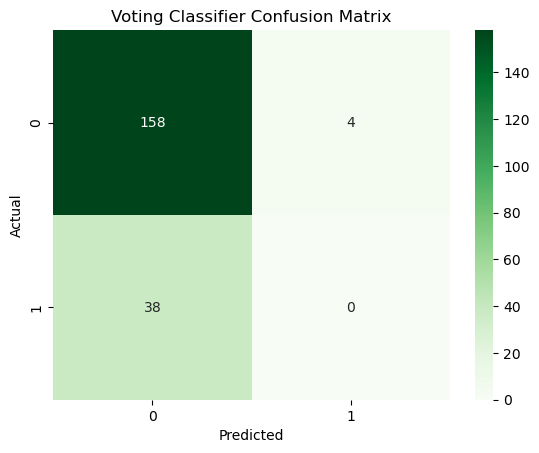

In [40]:
#Ensemble (Voting Classifier)
voting_clf = VotingClassifier(
    estimators=[
        ("log_reg", log_reg),
        ("rf", rf_clf),
        ("xgb", xgb_clf)
    ],
    voting="soft"  # soft = probabilities, hard = majority voting
)

voting_clf.fit(X_train_processed, y_train)
y_pred_voting = voting_clf.predict(X_test_processed)

print("\n📊 Ensemble (Voting Classifier) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))

cm = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
#Save the Best Model
# Compare model accuracies
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_processed)
    results[name] = accuracy_score(y_test, y_pred)

In [44]:

# Add ensemble result
results["Voting Classifier"] = accuracy_score(y_test, y_pred_voting)

# Find best model
best_model_name = max(results, key=results.get)
print("\n🏆 Best model:", best_model_name, "with accuracy:", results[best_model_name])

if best_model_name == "Logistic Regression":
    best_model = log_reg
elif best_model_name == "Random Forest":
    best_model = rf_clf
elif best_model_name == "XGBoost":
    best_model = xgb_clf
else:
    best_model = voting_clf




🏆 Best model: Random Forest with accuracy: 0.81


In [45]:
# Example pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier(random_state=42))
])

# Fit pipeline on training data
pipeline.fit(X_train_processed, y_train)

# Save the pipeline (no need to save scaler separately!)
import joblib
joblib.dump(pipeline, "models/attrition_pipeline.pkl")

['models/attrition_pipeline.pkl']